  <h1><center>Liver Disease Prediction</center></h1>

In [1]:
#Importing Libraries
import pandas as pd
import itertools 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
#Loading Dataset
df = pd.read_csv('Indian_Liver_Patients_Dataset.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
#Creating a new column to determine if the subject has liver disease
def label_disease(df):
    if df["Dataset"] == 1:
        return "Yes"
    return "No"

df['Disease'] = df.apply(lambda df:label_disease(df), axis=1)

df = df.drop(columns=["Dataset"],axis=1)
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,No
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,Yes
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,Yes
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,Yes
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,No


In [4]:
#Number of Patients with liver disease
df['Disease'].value_counts()

Yes    416
No     167
Name: Disease, dtype: int64

## Data Visualization

In [5]:
#Creating a correlation matrix to understand the data
df.corr(numeric_only=True)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000


<AxesSubplot:>

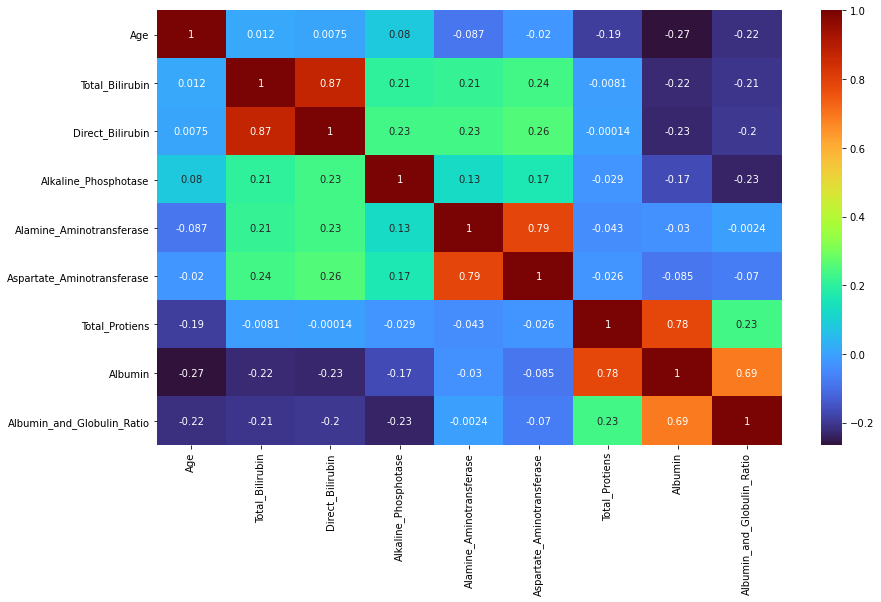

In [6]:
#Plotting a heatmap based on the above matrix
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='turbo')

### Visualizing Barplots to Understand Correlation

<AxesSubplot:xlabel='Disease', ylabel='Total_Bilirubin'>

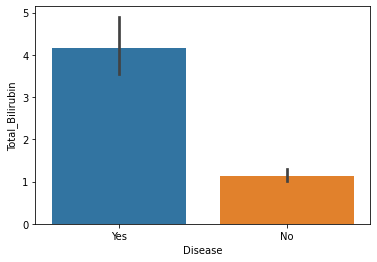

In [7]:
sns.barplot(data=df,x=df["Disease"],y=df["Total_Bilirubin"])

<AxesSubplot:xlabel='Disease', ylabel='Alkaline_Phosphotase'>

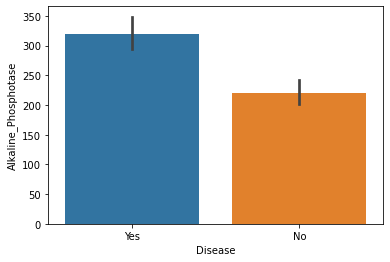

In [8]:
sns.barplot(data=df,x=df["Disease"],y=df["Alkaline_Phosphotase"])

<AxesSubplot:xlabel='Disease', ylabel='Albumin_and_Globulin_Ratio'>

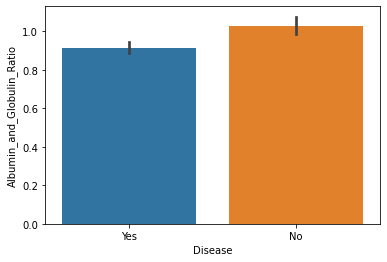

In [9]:
sns.barplot(data=df,x=df["Disease"],y=df["Albumin_and_Globulin_Ratio"])

<AxesSubplot:xlabel='Disease', ylabel='Total_Protiens'>

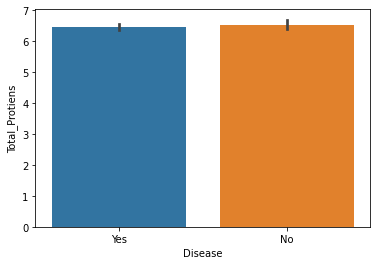

In [10]:
sns.barplot(data=df,x=df["Disease"],y=df["Total_Protiens"])

#### We can make an observation that subjects with liver disease have an increased concentration of Bilirubin & Alkaline Phosphatase in their body.

## Data Preprocessing

In [11]:
#Changing Gender values to Numeric
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)

In [12]:
#Checking if any column has null values
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Disease                       0
dtype: int64

In [13]:
#Replacing null values with the mean
df['Albumin_and_Globulin_Ratio'].fillna((df['Albumin_and_Globulin_Ratio'].mean()), inplace=True)
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Disease                       0
dtype: int64

### Feature Selection

In [14]:
Feature = df[['Age','Gender','Total_Bilirubin','Direct_Bilirubin',
                      'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                      'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

In [15]:
X = Feature
y = df['Disease'].values
y

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes

### Normalize Data

In [16]:
#Data Standardization
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 1.25209764,  1.76228085, -0.41887783, ...,  0.29211961,
         0.19896867, -0.14789798],
       [ 1.06663704, -0.56744644,  1.22517135, ...,  0.93756634,
         0.07315659, -0.65069686],
       [ 1.06663704, -0.56744644,  0.6449187 , ...,  0.47653296,
         0.19896867, -0.17932291],
       ...,
       [ 0.44843504, -0.56744644, -0.4027597 , ..., -0.0767071 ,
         0.07315659,  0.16635131],
       [-0.84978917, -0.56744644, -0.32216906, ...,  0.29211961,
         0.32478075,  0.16635131],
       [-0.41704777, -0.56744644, -0.37052344, ...,  0.75315299,
         1.58290153,  1.73759779]])

## Classification

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=5)
liverDiseaseTree = DecisionTreeClassifier(criterion='entropy',max_depth=7)
liverDiseaseTree.fit(X_trainset,y_trainset)
liverDiseaseTree

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [18]:
y_predicted = liverDiseaseTree.predict(X_testset)

In [19]:
from sklearn.metrics import f1_score
dt_f1 = f1_score(y_testset, y_predicted, average='weighted')
print(dt_f1)

0.615756097608413


### KNN

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Train Set:',X_train.shape, y_train.shape)
print('Test Set:',X_test.shape, y_test.shape)

Train Set: (466, 10) (466,)
Test Set: (117, 10) (117,)


In [21]:
Knn=10
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
mean_acc = np.zeros((Knn-1))
std_acc = np.zeros((Knn-1))
confusionMx = [];
for n in range(1,Knn):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    knn_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn_hat)
    std_acc[n-1]=np.std(knn_hat==y_test)/np.sqrt(knn_hat.shape[0])
mean_acc

array([0.65811966, 0.62393162, 0.62393162, 0.61538462, 0.65811966,
       0.64102564, 0.66666667, 0.62393162, 0.66666667])

In [22]:
print( "The best accuracy was with", mean_acc.max(),"with k =",mean_acc.argmax()+1) 

The best accuracy was with 0.6666666666666666 with k = 7


In [23]:
from sklearn.neighbors import KNeighborsClassifier
k_nearest = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
k_nearest

KNeighborsClassifier(n_neighbors=7)

In [24]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test, knn_hat, average='weighted')
print(knn_f1)

0.6199659473921957


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LogReg

LogisticRegression(C=0.01, solver='liblinear')

In [26]:
LogReg_yhat = LogReg.predict(X_test)
LogReg_yhat[0:5]

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [27]:
LogReg_yhat_prob = LogReg.predict_proba(X_test)
LogReg_yhat_prob[0:5]

array([[0.38550075, 0.61449925],
       [0.38140643, 0.61859357],
       [0.38581889, 0.61418111],
       [0.41372373, 0.58627627],
       [0.45929773, 0.54070227]])

In [35]:
from sklearn.metrics import f1_score
lr_f1 = f1_score(y_test, LogReg_yhat, average='weighted')
print(lr_f1)

0.7033393670265179


In [36]:
from sklearn.metrics import log_loss
lr_log = log_loss(y_test, LogReg_yhat_prob)
print(lr_log)

0.5722557867737494


### Support Vector Machine

In [30]:
from sklearn import svm
from sklearn.metrics import f1_score

In [31]:
Svm = svm.SVC(kernel='rbf')
Svm.fit(X_trainset,y_trainset)
svm_yhat = Svm.predict(X_test)

In [32]:
from sklearn.metrics import f1_score
svm_f1 = f1_score(y_test, svm_yhat, average='weighted')
print(svm_f1)

0.5934692088538241


## Accuracy Report

In [37]:
f1_list = [knn_f1, dt_f1, svm_f1, LR_f1]

accuracyReport = pd.DataFrame(f1_list, index=['KNN','Decision Tree','SVM','LogisticRegression'])
accuracyReport.columns = ['F1-score']
accuracyReport.columns.name = 'Algorithm'
accuracyReport

Algorithm,F1-score
KNN,0.619966
Decision Tree,0.615756
SVM,0.593469
LogisticRegression,0.703339


#### The accuracy report shows the performance of each algorithm on test data, and we can conclude that Logistic Regression has the highest accuracy.